In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as sco
import time
import datetime
from pathlib import Path
from pandas_datareader import data as wb
import statsmodels.api as sm
from statsmodels import regression

In [2]:
choice = int(input('Enter a number 1-ETF or 2-Stocks or 3-Crypto. Please enter only 1 or 2 or 3'))

Enter a number 1-ETF or 2-Stocks or 3-Crypto. Please enter only 1 or 2 or 3 3


In [3]:
ETF = ['XLK', 'XLV', 'XLY', 'XLC','XLF','XLI','XLP','XLU','XLB','XLRE','XLE', 'GDX', 'SPY']


Equities = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOGL', 'FB', 'GOOG', 'NVDA', 'JPM', 'JNJ', 'UNH', 'HD', 'PG', 
              'V', 'BAC', 'MA', 'PFE', 'XOM', 'DIS', 'CSCO', 'AVGO', 'ADBE', 'CVX', 'TMO', 'ABBV', 'PEP', 'ABT', 'NFLX',
              'ACN', 'KO', 'CMCSA', 'COST', 'CRM', 'INTC', 'PYPL', 'WFC', 'VZ', 'LLY', 'QCOM', 'MRK', 'WMT', 'MCD', 'DHR',
              'NKE', 'T', 'LOW', 'LIN', 'TXN', 'NEE', 'AMD', 'INTU', 'UNP', 'PM', 'UPS', 'MS', 'HON', 'MDT', 'BMY', 'ORCL',
              'SCHW', 'CVS', 'AMAT', 'GS', 'RTX', 'C', 'AMGN', 'BLK', 'SBUX', 'CAT', 'IBM', 'BA', 'AMT', 'ISRG', 'NOW', 'PLD',
              'GE', 'TGT', 'ANTM', 'COP', 'AXP', 'DE', 'SPGI', 'MU', 'MMM', 'BKNG', 'ZTS', 'ADP', 'F', 'PNC', 'LRCX', 'MDLZ',
              'ADI', 'MO','GILD', 'SYK', 'LMT', 'TJX', 'GM', 'TFC', 'CB', 'MMC', 'USB', 'CCI', 'CSX', 'CME', 'SPY']

crypto = ['SPY','ETH-USD','BTC-USD','ADA-USD', 'XRP-USD']


stocks = []

if choice == 1:
    stocks = ETF        
elif choice == 2:
    stocks = Equities
elif choice == 3:
    stocks = crypto

    
print(stocks)

['SPY', 'ETH-USD', 'BTC-USD', 'ADA-USD', 'XRP-USD']


In [4]:
pf_data = pd.DataFrame()
# Pulling closing price   
for stock in stocks:
    pf_data_temp = pd.DataFrame()
    pf_data_temp[stock] = wb.DataReader(stock, data_source = 'yahoo', start = '2020-1-1')['Adj Close']
    pf_data = pd.concat([pf_data,pf_data_temp], axis = 1)
    del pf_data_temp
    print (stock)

num_stocks = len(stocks)          
print (num_stocks)

SPY
ETH-USD
BTC-USD
ADA-USD
XRP-USD
5


In [5]:
pf_data = pf_data.dropna()
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
#pf_data = pf_data.rename(columns={'XLK': 'Technology', 'XLV': 'HealthCare','XLY': 'ConsumerDiscretionary', 'XLC': 'CommunicationServices','XLF': 'Financial', 'XLI': 'Industrial' ,'XLP': 'ConsumerStaples','XLU': 'Utilities', 'XLB': 'Materials','XLRE': 'RealEstate', 'XLE': 'Energy','GDX': 'Gold',  'SPY': 'SP500'  })
pf_data.isna().sum() >1

SPY        False
ETH-USD    False
BTC-USD    False
ADA-USD    False
XRP-USD    False
dtype: bool

In [6]:
pf_data

,SPY,ETH-USD,BTC-USD,ADA-USD,XRP-USD
Date,,,,,
2020-01-02,314.719177,127.410179,6985.470215,0.032751,0.188043
2020-01-03,312.336121,134.171707,7344.884277,0.034180,0.193521
2020-01-06,313.527618,144.304153,7769.219238,0.037272,0.221510
2020-01-07,312.646088,143.543991,8163.692383,0.037047,0.213917
2020-01-08,314.312347,141.258133,8079.862793,0.036435,0.209026
...,...,...,...,...,...
2022-01-10,465.510010,3083.097900,41821.261719,1.128052,0.739335
2022-01-11,469.750000,3238.111572,42735.855469,1.185110,0.770554
2022-01-12,471.019989,3372.258301,43949.101562,1.304535,0.799548


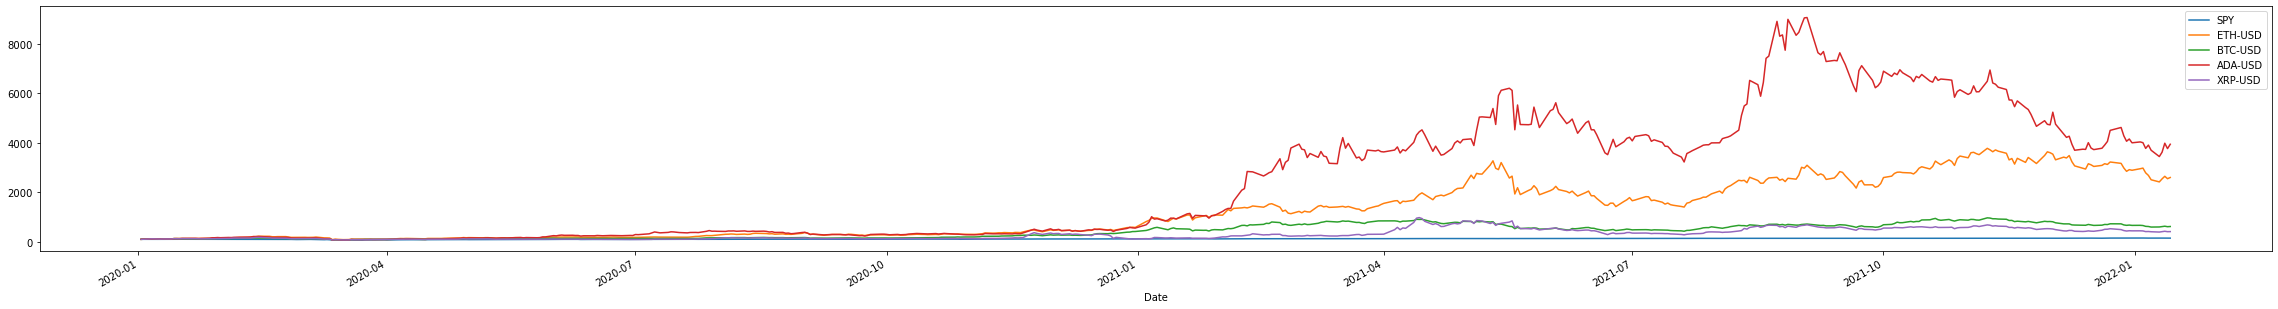

In [7]:
# Plotting Normalized returns
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(40, 5))
plt.show()

In [8]:
# Daily percentage change
pf_data_returns = pf_data.pct_change(1)
pf_data_returns = pf_data_returns[1:]

In [9]:
beta = {}
alpha = {}

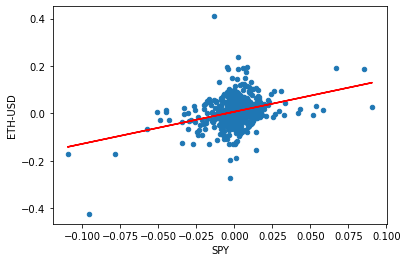

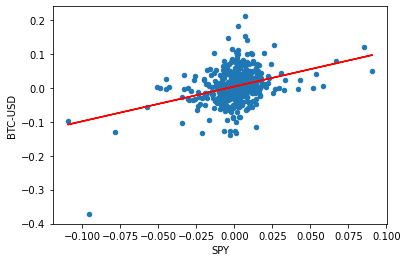

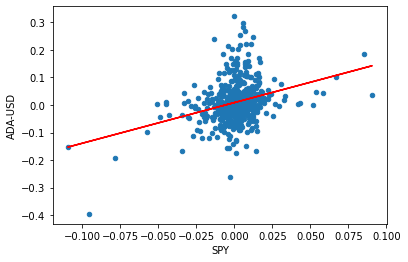

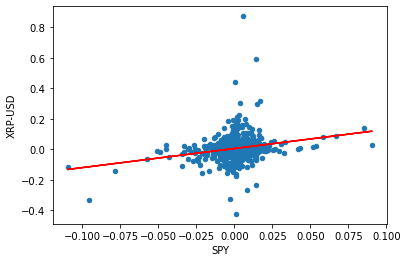

In [10]:
for i in pf_data_returns.columns:
    if i != 'SPY':
        pf_data_returns.plot(kind = 'scatter', x = 'SPY', y = i)
        b,a = np.polyfit(pf_data_returns['SPY'], pf_data_returns[i],    1)
        plt.plot(pf_data_returns['SPY'], b * pf_data_returns['SPY'] + a, '-', color = 'r')  
        beta[i] = b    
        alpha[i] = a
        plt.show()

In [11]:
keys = list(beta.keys())

In [12]:
ER = {}
rf = 0.0025 
rm = pf_data_returns['SPY'].mean() * 252

In [13]:
for i in keys:
    ER[i] = rf + (beta[i] * (rm-rf))
    print('Expected Return based on CAPM for {} is {}%'.format(i,round(ER[i]*100,2)))

Expected Return based on CAPM for ETH-USD is 30.11%
Expected Return based on CAPM for BTC-USD is 22.85%
Expected Return based on CAPM for ADA-USD is 32.85%
Expected Return based on CAPM for XRP-USD is 27.87%


In [14]:
portfolio_weights = 1/(num_stocks-1)  * np.ones(num_stocks-1) 
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
print('Expected Return based on CAPM for the portfolio is {}%\n'.format(round(ER_portfolio*100,2)))

Expected Return based on CAPM for the portfolio is 28.42%



In [15]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [16]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(stocks) )
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [17]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [18]:
def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [19]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

In [20]:
def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [21]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

In [22]:
def portfolio_return(weights):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [23]:
def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [24]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=pf_data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=pf_data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Optimal Portfolio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Min Risk Portfolio')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('Annualised Volatility')
    plt.ylabel('Annualised Returns')
    plt.legend(labelspacing = 0.8)


In [25]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=pf_data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=pf_data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    #print ("-"*80)
    #print ("Minimum Volatility Portfolio Allocation\n")
    #print ("Annualised Return:", round(rp_min,2))
    #print ("Annualised Volatility:", round(sdp_min,2))
    #print ("\n")
    #print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    target = np.linspace(rp_min, 0.60, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('Annualised Volatility')
    plt.ylabel('Annualised Returns')
    plt.legend(labelspacing = 0.8)

In [26]:
returns = pf_data.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 100000
risk_free_rate = 0.0025

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.93
Annualised Volatility: 0.85


              SPY  ETH-USD  BTC-USD  ADA-USD  XRP-USD
allocation  17.87    42.67     0.84    38.27     0.35
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.49
Annualised Volatility: 0.31


              SPY  ETH-USD  BTC-USD  ADA-USD  XRP-USD
allocation  77.47     4.01     15.3     0.08     3.14


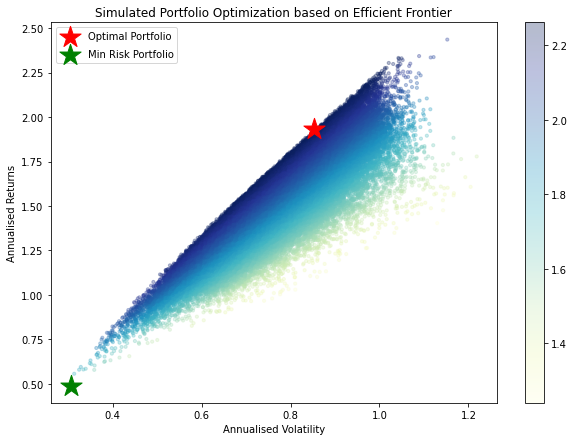

In [27]:
# Simulating Portfolios based on Efficient Frontier
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [28]:
def utility_optimal_portfolio(data,risk_aversion_coeff):
    # Importing libraries
    from pypfopt import EfficientFrontier
    from pypfopt import risk_models
    from pypfopt import expected_returns
    from pypfopt import objective_functions
    
    # Expected Returns
    mu = expected_returns.mean_historical_return(pf_data)
    # Expected Volatility
    Sigma = risk_models.sample_cov(pf_data)
    ef = EfficientFrontier(mu, Sigma)  # setup
    ef.add_objective(objective_functions.L2_reg)  # add a secondary objective
    weights = ef.max_quadratic_utility(risk_aversion=risk_aversion_coeff, market_neutral=False)  # find the portfolio that maximizes utility
    ret,vol,sharpe_r = ef.portfolio_performance(risk_free_rate=0.01125)
    # loop to iterate for values  
    res = dict() 
    for key in weights:  
    # rounding to K using round() 
        res[key] = round(weights[key], 2) 
    
    return "Allocation " + str(res),'Annualised Reutrn ' + str(round(ret,2)),'Annualised Volatility ' + str(round(vol,2)),'Sharpe Ratio ' + str(round(sharpe_r,2))

In [29]:
# Aggressive Investor
utility_optimal_portfolio(pf_data,1)

("Allocation {'SPY': 0.0, 'ETH-USD': 0.31, 'BTC-USD': 0.0, 'ADA-USD': 0.69, 'XRP-USD': 0.0}",
 'Annualised Reutrn 4.72',
 'Annualised Volatility 1.08',
 'Sharpe Ratio 4.36')

In [30]:
# Moderate Investor
utility_optimal_portfolio(pf_data,4)

("Allocation {'SPY': 0.09, 'ETH-USD': 0.4, 'BTC-USD': 0.0, 'ADA-USD': 0.51, 'XRP-USD': 0.0}",
 'Annualised Reutrn 4.16',
 'Annualised Volatility 0.95',
 'Sharpe Ratio 4.36')

In [31]:
# Risk-Averse Investor
utility_optimal_portfolio(pf_data,10)

("Allocation {'SPY': 0.52, 'ETH-USD': 0.23, 'BTC-USD': 0.0, 'ADA-USD': 0.25, 'XRP-USD': 0.0}",
 'Annualised Reutrn 2.3',
 'Annualised Volatility 0.56',
 'Sharpe Ratio 4.09')

In [32]:
# Test Risk Level
utility_optimal_portfolio(pf_data,2.5)

("Allocation {'SPY': 0.0, 'ETH-USD': 0.39, 'BTC-USD': 0.0, 'ADA-USD': 0.61, 'XRP-USD': 0.0}",
 'Annualised Reutrn 4.62',
 'Annualised Volatility 1.05',
 'Sharpe Ratio 4.38')

In [33]:
riskLevel = int(input('Please enter your risk level between 1 and 10. 1 being very risk and 10 being risk averse.'))

Please enter your risk level between 1 and 10. 1 being very risk and 10 being risk averse. 6


In [34]:
utility_optimal_portfolio(pf_data,riskLevel)

("Allocation {'SPY': 0.3, 'ETH-USD': 0.32, 'BTC-USD': 0.0, 'ADA-USD': 0.38, 'XRP-USD': 0.0}",
 'Annualised Reutrn 3.27',
 'Annualised Volatility 0.76',
 'Sharpe Ratio 4.28')